In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
x = np.linspace(-1., 1., 100)
print(x[:5], x.shape)

x_1 = x.reshape(-1, 1)
print(x_1[:5], x_1.shape)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192] (100,)
[[-1.        ]
 [-0.97979798]
 [-0.95959596]
 [-0.93939394]
 [-0.91919192]] (100, 1)


In [3]:
y = 4 + 3*x + 2*np.sin(x) + 2*np.random.randn(len(x))

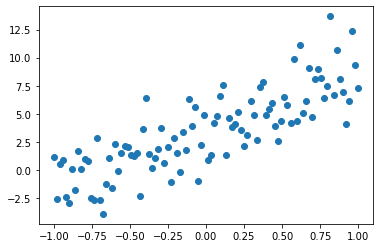

In [4]:
plt.scatter(x, y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [8]:
lr.coef_

array([5.07706307])

In [9]:
lr.intercept_

3.4652950711067247

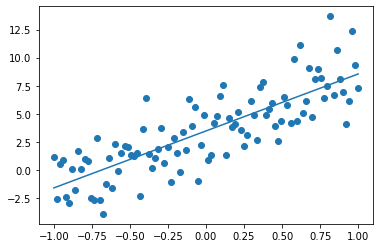

In [11]:
plt.scatter(x, y)
y_pred = lr.predict(x.reshape(-1, 1))
plt.plot(x, y_pred)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
PolynomialFeatures?

In [128]:
poly = PolynomialFeatures(degree=120, include_bias=False)

In [129]:
x_new = poly.fit_transform(x.reshape(-1, 1))

In [130]:
x_new.shape

(100, 120)

In [131]:
np.allclose(x_new[:, 1], x_new[:, 0]**2)

True

In [132]:
lr = LinearRegression()

In [133]:
lr.fit(x_new, y)

LinearRegression()

In [134]:
np.around(lr.coef_, 0)

array([ 1.00000000e+01,  8.05000000e+02,  1.92000000e+02, -6.98500000e+04,
       -9.78910000e+04,  2.58692400e+06,  7.03355700e+06, -5.43776260e+07,
       -2.31537516e+08,  7.47035483e+08,  4.36390764e+09, -7.39755975e+09,
       -5.22027142e+10,  5.68136452e+10,  4.19183647e+11, -3.50649221e+11,
       -2.32539052e+12,  1.72183383e+12,  8.97394127e+12, -6.45868131e+12,
       -2.36444581e+13,  1.74954303e+13,  3.97817185e+13, -3.14641223e+13,
       -3.38919821e+13,  3.06795409e+13, -5.66848095e+12, -1.25047947e+12,
        3.42878102e+13, -2.58173420e+13, -4.15303444e+12,  4.24308061e+12,
       -2.64495572e+13,  2.63658102e+13, -8.12482399e+12,  2.06427227e+11,
        2.14910263e+13, -1.81754023e+13,  2.22388625e+13, -1.78575984e+13,
       -5.49502475e+12,  4.45415892e+12, -2.29335451e+13,  2.40652927e+13,
       -1.87614412e+13,  1.71527621e+13,  3.92620728e+12, -6.17884396e+12,
        1.88663168e+13, -2.05004266e+13,  2.18910299e+13, -1.95461057e+13,
        6.74255635e+12, -

In [135]:
np.round(np.max(lr.coef_), 2)

39781718507208.28

In [136]:
lr.intercept_

1.7318966336067252

Text(0.5, 1.0, 'Error on train set is: 220.69')

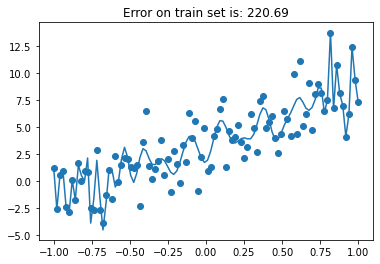

In [137]:
plt.scatter(x, y)
y_pred = lr.predict(x_new)
plt.plot(x, y_pred)
e = (y - y_pred).reshape(-1, 1)
plt.title(f"Error on train set is: {np.round((e.T@e)[0, 0], 2)}")

In [138]:
np.linalg.norm(e, 2)

14.855806111468029

In [139]:
from sklearn.metrics import mean_squared_error